In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('soda.csv')
dataset.head()

,temperature,units_sold
0,44.0,2600.0
1,96.0,12126.0
2,96.0,12107.0
3,36.0,1639.0
4,42.0,2400.0


In [3]:
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


## Scatter plot

Text(0, 0.5, 'Units Sold')

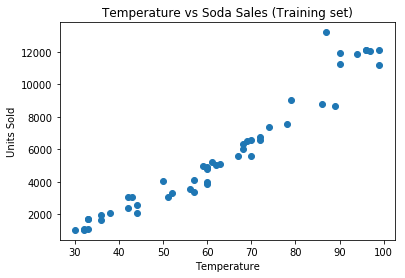

In [4]:
plt.scatter(dataset.temperature, dataset.units_sold)
plt.title('Temperature vs Soda Sales (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Units Sold')

## Preprocessing

In [18]:
X = dataset.iloc[:, -1].values
y = dataset.iloc[:, 1].values
X.reshape(-1,1)
#y.reshape(-1,1)

array([[ 2600.],
       [12126.],
       [12107.],
       [ 1639.],
       [ 2400.],
       [ 6007.],
       [ 6562.],
       [ 1697.],
       [ 6529.],
       [ 7367.],
       [ 6753.],
       [ 6585.],
       [ 5042.],
       [12055.],
       [ 4892.],
       [11261.],
       [ 3083.],
       [ 3889.],
       [ 3992.],
       [11843.],
       [ 5090.],
       [ 6316.],
       [ 1715.],
       [ 2060.],
       [ 3576.],
       [ 1053.],
       [ 5244.],
       [ 1988.],
       [12095.],
       [11167.],
       [ 4778.],
       [ 3036.],
       [ 9036.],
       [ 5559.],
       [ 4047.],
       [ 3042.],
       [ 3294.],
       [ 3397.],
       [ 1094.],
       [13194.],
       [ 4137.],
       [11893.],
       [ 1042.],
       [ 5594.],
       [ 4942.],
       [ 8805.],
       [ 2088.],
       [ 8638.],
       [ 7549.],
       [ 1094.]])

## train-test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model

In [20]:
from sklearn.preprocessing import PolynomialFeatures

#Extracting polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[ 8805.  4942.  1639.  2400. 12126.  6529.  6753.  6585.  4892. 12107.
  6007. 12055.  5559.  1697.  3036.  6316.  3042. 11843.  3992. 11261.
  1042.  2060.  3397.  7367. 11167.  1094.  2088.  1094.  4137. 11893.
  2600.  3889.  1053.  6562.  5042.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
print(X_train[0:5])
print(X_train_poly[0:5])

[13194.  1715.  3042.  6562.  1697.]
[[1.000e+00 9.900e+01 9.801e+03]
 [1.000e+00 6.000e+01 3.600e+03]
 [1.000e+00 9.000e+01 8.100e+03]
 [1.000e+00 7.400e+01 5.476e+03]
 [1.000e+00 3.600e+01 1.296e+03]]


In [39]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

#Training our model
regression.fit(X_train_poly, y_train)

#Predicting values
y_pred = regression.predict(X_test_poly)

## Plotting 

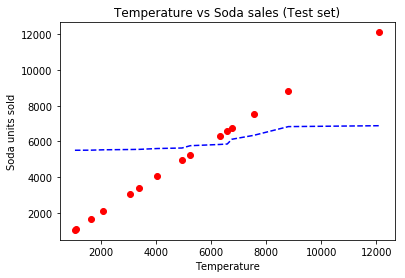

In [40]:
plt.scatter(X_test,y_test, color='red')
plt.plot(sorted(X_test),sorted(y_pred),'--',color='blue')
plt.title('Temperature vs Soda sales (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Soda units sold')
plt.show()